In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
data=load_breast_cancer()

In [5]:
X=data['data']
Y=data['target']

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [7]:
rf=RandomForestClassifier(n_estimators=2,max_depth=3)

In [8]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=2)

In [10]:
rf.score(xtrain,ytrain),rf.score(xtest,ytest)

(0.9516483516483516, 0.9122807017543859)

In [11]:
p=rf.predict_proba(xtest)[:,1]

In [18]:
class AUC:
    def __init__(self,y_true,y_score):
        ts=np.arange(0,1.02,0.01).reshape(1,-1)
        idx_0=(y_true==0)
        idx_1=(y_true==1)

        y_pred=(y_score.reshape(-1,1)>=ts).astype('int')
        self.fpr=y_pred[idx_0].mean(0)
        self.tpr=y_pred[idx_1].mean(0)

    def plot_roc(self):
        
        plt.plot(self.fpr,self.tpr)
        plt.show()

    def area(self):
        idx=np.argsort(self.fpr)
        x=self.fpr[idx]
        y=self.tpr[idx]
        A=0.5*(y[1:]+y[:-1])*(x[1:]-x[:-1])

        return A.sum()

In [19]:
auc=AUC(ytest,p)

In [20]:
auc.area()

0.9616747181964573

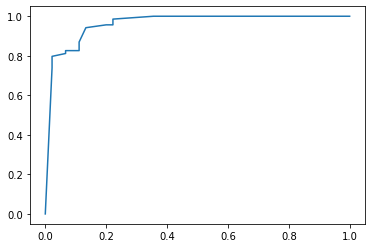

In [21]:
auc.plot_roc()

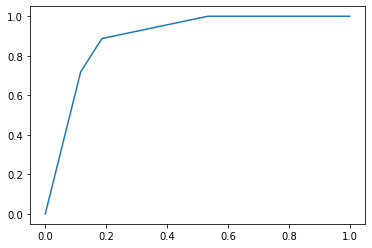

In [158]:
plt.plot(a,b)

# ROC curve

In [ ]:
x1=np.random.normal(0.35,0.15,1000)
#x1=x1/x1.max()
x2=np.random.normal(0.7,0.1,1000)
#x2=x2/x2.max()
sns.set(font_scale=2)
sns.set_style("white")
fig,axs=plt.subplots(3,figsize=(18,30))

ax_1=sns.distplot(x1,bins=20,ax=axs[0])
ax_2=sns.distplot(x2,bins=20,ax=axs[0],color='orange')
x_1=ax_1.lines[0].get_xydata()[:,0]
y_1=ax_1.lines[0].get_xydata()[:,1]
x_2=ax_2.lines[1].get_xydata()[:,0]
y_2=ax_2.lines[1].get_xydata()[:,1]

t=0.6
axs[0].plot([t,t],[0,2.4],linewidth=3,color='r',linestyle='--')
axs[0].set_xlabel('p(x)')
axs[0].legend(['y=0','y=1',f't={t}'])

sns.distplot(x1, bins=20,ax=axs[1])
t=0.6
idx=x_1>=t
axs[1].plot(x_2,y_2)
axs[1].fill_between(x_1[idx],y_1[idx],color='blue')
axs[1].fill_between(x_1[~idx],y_1[~idx],color='yellow')
axs[1].plot([t,t],[0,0.7],linewidth=3,color='r',linestyle='--')
axs[1].set_xlabel('p(x)')
axs[1].legend(['y=0',f't={t}'])
axs[1].text(0.3,1.5,r'TNR',fontsize=30)
axs[1].text(0.65,0.5,r'FPR',fontsize=30)

sns.distplot(x2,bins=20,ax=axs[2],color='orange')
t=0.6
idx=x_2>=t
axs[2].plot(x_1,y_1)
axs[2].fill_between(x_2[idx],y_2[idx],color='red')
axs[2].fill_between(x_2[~idx],y_2[~idx],color='green')
axs[2].plot([t,t],[0,2.4],linewidth=3,color='r',linestyle='--')
axs[2].set_xlabel('p(x)')
axs[2].legend(['y=1',f't={t}'])
axs[2].text(0.7,2,r'TPR',fontsize=30)
axs[2].text(0.53,0.5,r'FNR',fontsize=30)
plt.show()

In [ ]:
fprs=[]
tprs=[]
for t in np.arange(0,1,0.01):
    tpr=(x2>t).mean()
    fpr=(x1>=t).mean()
    fprs.append(fpr)
    tprs.append(tpr)

a=np.array(fprs)
b=np.array(tprs)
s=a**2+(1-b)*(1-b)
s.argmin()

plt.figure(figsize=(10,8))
ax=sns.lineplot(fprs,tprs,linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(a[56],b[56],marker='o',color='r',markersize=14,markerfacecolor='none')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(['ROC curve','optimal','random'])